Скачуємо необхідні бібліотеки

In [18]:
%pip install numpy pandas scikit-learn seaborn matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Імпортуємо бібліотеки

In [107]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

Скачуємо датасет

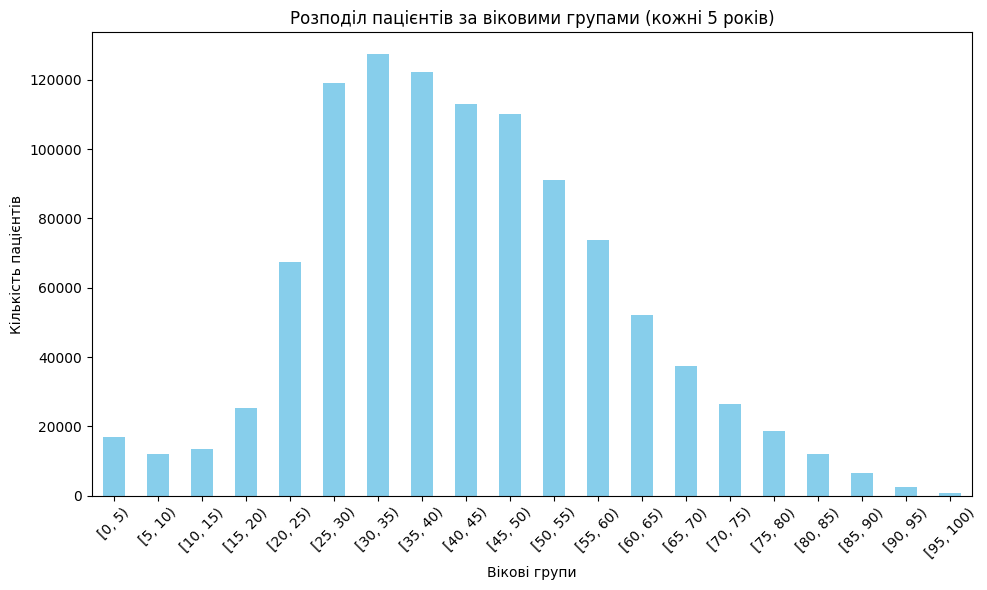

In [108]:
# Створюємо новий стовпець з віковими групами кожні 5 років
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=range(0, 101, 5), right=False)

# Групуємо дані за віковими групами та підраховуємо кількість
age_group_counts = df['AGE_GROUP'].value_counts().sort_index()

# Побудова стовпчастої діаграми
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Вікові групи')
plt.ylabel('Кількість пацієнтів')
plt.title('Розподіл пацієнтів за віковими групами (кожні 5 років)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

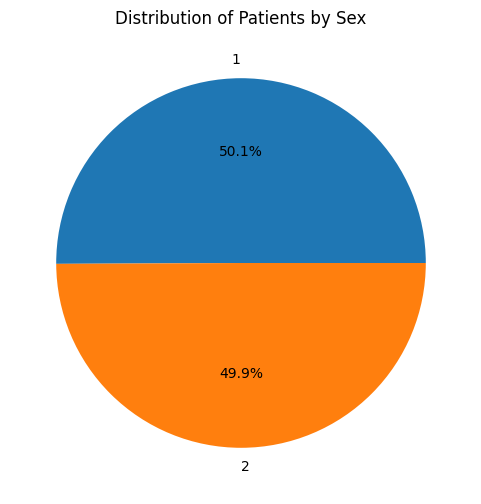

In [109]:
# Фільтрація даних за віком та статтею
age_sex_df = df[['AGE', 'SEX']]

# Групування за віком та статтею та підрахунок кількості
age_sex_counts = age_sex_df.groupby(['AGE', 'SEX']).size().unstack()

# Побудова кругової діаграми для виведення за статтю
plt.figure(figsize=(6, 6))
plt.pie(age_sex_counts.sum(axis=0), labels=age_sex_counts.columns, autopct='%1.1f%%')
plt.title('Distribution of Patients by Sex')
plt.show()

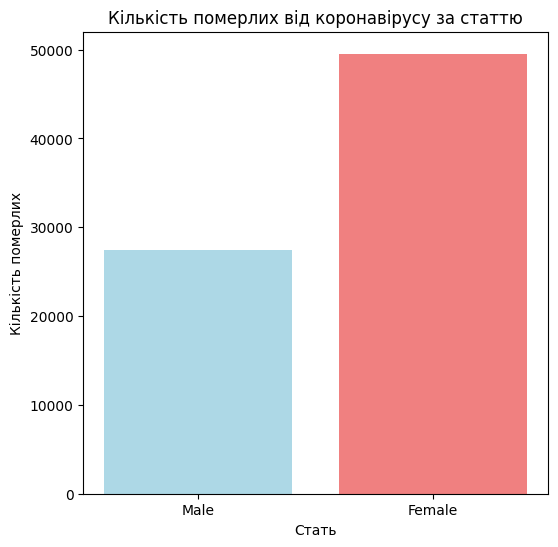

In [110]:
# Фільтруємо дані для померлих чоловіків і жінок
dead_male_count = df[(df['SEX'] == 1) & (df['DATE_DIED'] != '9999-99-99')]['USMER'].count()
dead_female_count = df[(df['SEX'] == 2) & (df['DATE_DIED'] != '9999-99-99')]['USMER'].count()

# Побудова діаграми
plt.figure(figsize=(6, 6))
plt.bar(['Male', 'Female'], [dead_male_count, dead_female_count], color=['lightblue', 'lightcoral'])
plt.xlabel('Стать')
plt.ylabel('Кількість померлих')
plt.title('Кількість померлих від коронавірусу за статтю')
plt.show()

In [111]:
covid = pd.read_csv("Dataset/Covid Data.csv")
print(covid)
print(covid.columns)

         USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  \
0            2             1    1             1  03/05/2020       97   
1            2             1    2             1  03/06/2020       97   
2            2             1    2             2  09/06/2020        1   
3            2             1    1             1  12/06/2020       97   
4            2             1    2             1  21/06/2020       97   
...        ...           ...  ...           ...         ...      ...   
1048570      2            13    2             1  9999-99-99       97   
1048571      1            13    2             2  9999-99-99        2   
1048572      2            13    2             1  9999-99-99       97   
1048573      2            13    2             1  9999-99-99       97   
1048574      2            13    2             1  9999-99-99       97   

         PNEUMONIA  AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  \
0                1   65         2         2  ...       2        2 

In [51]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

Перевіряємо кількість NaN значень

In [112]:
null_counts_1 = covid.isnull().sum()
print(null_counts_1)

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64


Як бачимо датасет не містить NaN значень. У датасеті так і написано, що всі пропущені значення заміненні на 97 і 99

In [113]:
for column_name in covid.columns:
    count_97_values = (covid[column_name] == 97).sum()
    print(f"Кількість значень 97 у стовпці '{column_name}': {count_97_values}")

Кількість значень 97 у стовпці 'USMER': 0
Кількість значень 97 у стовпці 'MEDICAL_UNIT': 0
Кількість значень 97 у стовпці 'SEX': 0
Кількість значень 97 у стовпці 'PATIENT_TYPE': 0
Кількість значень 97 у стовпці 'DATE_DIED': 0
Кількість значень 97 у стовпці 'INTUBED': 848544
Кількість значень 97 у стовпці 'PNEUMONIA': 0
Кількість значень 97 у стовпці 'AGE': 135
Кількість значень 97 у стовпці 'PREGNANT': 523511
Кількість значень 97 у стовпці 'DIABETES': 0
Кількість значень 97 у стовпці 'COPD': 0
Кількість значень 97 у стовпці 'ASTHMA': 0
Кількість значень 97 у стовпці 'INMSUPR': 0
Кількість значень 97 у стовпці 'HIPERTENSION': 0
Кількість значень 97 у стовпці 'OTHER_DISEASE': 0
Кількість значень 97 у стовпці 'CARDIOVASCULAR': 0
Кількість значень 97 у стовпці 'OBESITY': 0
Кількість значень 97 у стовпці 'RENAL_CHRONIC': 0
Кількість значень 97 у стовпці 'TOBACCO': 0
Кількість значень 97 у стовпці 'CLASIFFICATION_FINAL': 0
Кількість значень 97 у стовпці 'ICU': 848544


In [114]:
for column_name in covid.columns:
    count_99_values = (covid[column_name] == 99).sum()
    print(f"Кількість значень 99 у стовпці '{column_name}': {count_99_values}")

Кількість значень 99 у стовпці 'USMER': 0
Кількість значень 99 у стовпці 'MEDICAL_UNIT': 0
Кількість значень 99 у стовпці 'SEX': 0
Кількість значень 99 у стовпці 'PATIENT_TYPE': 0
Кількість значень 99 у стовпці 'DATE_DIED': 0
Кількість значень 99 у стовпці 'INTUBED': 7325
Кількість значень 99 у стовпці 'PNEUMONIA': 16003
Кількість значень 99 у стовпці 'AGE': 86
Кількість значень 99 у стовпці 'PREGNANT': 0
Кількість значень 99 у стовпці 'DIABETES': 0
Кількість значень 99 у стовпці 'COPD': 0
Кількість значень 99 у стовпці 'ASTHMA': 0
Кількість значень 99 у стовпці 'INMSUPR': 0
Кількість значень 99 у стовпці 'HIPERTENSION': 0
Кількість значень 99 у стовпці 'OTHER_DISEASE': 0
Кількість значень 99 у стовпці 'CARDIOVASCULAR': 0
Кількість значень 99 у стовпці 'OBESITY': 0
Кількість значень 99 у стовпці 'RENAL_CHRONIC': 0
Кількість значень 99 у стовпці 'TOBACCO': 0
Кількість значень 99 у стовпці 'CLASIFFICATION_FINAL': 0
Кількість значень 99 у стовпці 'ICU': 7488


Виведемо інформацію дати смерті

In [115]:
covid.DATE_DIED.value_counts()

DATE_DIED
9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: count, Length: 401, dtype: int64

Цей стовпець є дуже важливим, оскільки ми можемо дізнатися чи людина при таких симптомах померла чи ні.

Дізнаємося якого типу даних є кожен стовпець датасету

In [116]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

Всі дані мають тип int, окрім дати смерті.

In [117]:
df = pd.read_csv("Dataset/Covid Data.csv")
df['DATE_DIED'] = df['DATE_DIED'].replace(['9999-99-99', '97', '99'], np.nan)

# Заміна неправильних значень у стовпці 'PREGNANT' і 'INTUBED' на NaN
df['PREGNANT'] = df['PREGNANT'].replace([97, 99], np.nan)
df['INTUBED'] = df['INTUBED'].replace([97, 99], np.nan)
df['ICU'] = df['ICU'].replace([97, 99], np.nan)

# Вибірки для обрахунку
columns_to_calculate = ['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'AGE',
                        'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE',
                        'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU']

# Функція для обрахунку статистики
def calculate_statistics(column_name):
    mean_value = df[column_name].mean()
    mode_value = df[column_name].mode().values[0] if not df[column_name].mode().empty else np.nan
    median_value = df[column_name].median()
    return mean_value, mode_value, median_value

# Створення DataFrame для виведення результатів
statistics_df = pd.DataFrame(columns=['mean', 'mode', '50%'])

# Додавання результатів обрахунків до DataFrame
for column in columns_to_calculate:
    mean_val, mode_val, median_val = calculate_statistics(column)
    statistics_df.loc[column] = [mean_val, mode_val, median_val]

# Виведення результатів у вигляді таблички
print("Summary Statistics:")
print(statistics_df)

Summary Statistics:
                           mean  mode   50%
USMER                  1.632194   2.0   2.0
MEDICAL_UNIT           8.980565  12.0  12.0
SEX                    1.499259   1.0   1.0
PATIENT_TYPE           1.190765   1.0   1.0
INTUBED                1.825351   2.0   2.0
PNEUMONIA              3.346831   2.0   2.0
AGE                   41.794102  30.0  40.0
PREGNANT               2.670876   2.0   2.0
DIABETES               2.186404   2.0   2.0
COPD                   2.260569   2.0   2.0
ASTHMA                 2.242626   2.0   2.0
INMSUPR                2.298132   2.0   2.0
HIPERTENSION           2.128989   2.0   2.0
OTHER_DISEASE          2.435143   2.0   2.0
CARDIOVASCULAR         2.261810   2.0   2.0
OBESITY                2.125176   2.0   2.0
RENAL_CHRONIC          2.257180   2.0   2.0
TOBACCO                2.214333   2.0   2.0
CLASIFFICATION_FINAL   5.305653   7.0   6.0
ICU                    1.912446   2.0   2.0


Поміняємо стовпець з датою смерті, на значення 0 або 1. Де 0 - жива людина, а 1 - мертва. Переназвемо цей стовпець на dead.

In [118]:
covid['dead'] = covid['DATE_DIED'].apply(lambda x: 0 if x == '9999-99-99' else 1)
covid.drop('DATE_DIED', axis=1, inplace=True)
print(covid.columns)

counts = covid['dead'].value_counts()
print(counts)

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
       'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'dead'],
      dtype='object')
dead
0    971633
1     76942
Name: count, dtype: int64


Замінимо всі пропущені значення медіаною, середнім значенням, модою, видалимо пропущені значення і замінимо на константу

Спочатку, для такого обрахування ми замінимо значення 97 і 99 на NaN. Оскільки медіана, мода і середнє значення будуть шукатися не правильно

In [121]:
from sklearn.impute import KNNImputer

covid.replace({99: np.nan, 97: np.nan}, inplace=True)

covid_median = covid.fillna(covid.median())

covid_mode = covid.apply(lambda x: x.fillna(x.mode().iloc[0]))

covid_mean = covid.fillna(covid.mean())

covid_dropped = covid.dropna()

covid_constant = covid.fillna(2)


Робимо моделі машинного навчання, для отримання найоптимальніших результатів. Розбиваємо дані на тестові і валідаційні для кожного виду імпутації

In [122]:
X_median = covid_median.drop('dead', axis=1)
y_median = covid_median['dead']

X_train_median, X_test_median, y_train_median, y_test_median = train_test_split(X_median, y_median, test_size=0.3, random_state=42)


X_mean = covid_mean.drop('dead', axis=1)
y_mean = covid_mean['dead']

X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(X_mean, y_mean, test_size=0.3, random_state=42)


X_mode = covid_mode.drop('dead', axis=1)
y_mode = covid_mode['dead']

X_train_mode, X_test_mode, y_train_mode, y_test_mode = train_test_split(X_mode, y_mode, test_size=0.3, random_state=42)


X_deleted_nan = covid_dropped.drop('dead', axis=1)
y_deleted_nan = covid_dropped['dead']

X_train_deleted_nan, X_test_deleted_nan, y_train_deleted_nan, y_test_deleted_nan = train_test_split(X_deleted_nan, y_deleted_nan, test_size=0.3, random_state=42)



X_constant = covid_constant.drop('dead', axis=1)
y_constant = covid_constant['dead']

X_train_constant, X_test_constant, y_train_constant, y_test_constant = train_test_split(X_constant, y_constant, test_size=0.3, random_state=42)

X_knn = knn_dataset.drop('dead', axis=1)
y_knn = knn_dataset['dead']

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.1, random_state=42)


NameError: name 'knn_dataset' is not defined

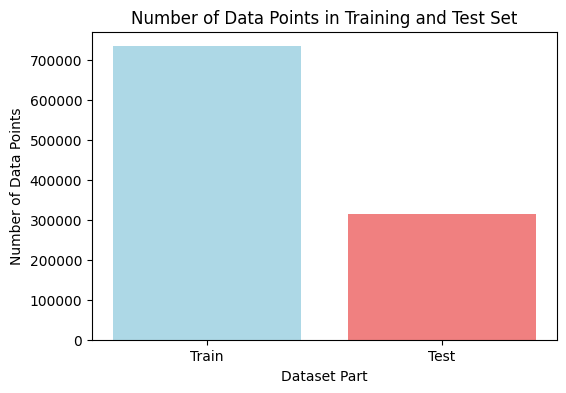

In [99]:
# Розмір тренувальної та тестової частини
train_size = X_train_median.shape[0]
test_size = X_test_median.shape[0]

# Побудова діаграми
plt.figure(figsize=(6, 4))
plt.bar(['Train', 'Test'], [train_size, test_size], color=['lightblue', 'lightcoral'])
plt.xlabel('Dataset Part')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points in Training and Test Set')
plt.show()

Імпортуємо необхідні бібліотеки для машинного навчання

In [30]:
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error


Створюємо масив з різними моделями машинного навчання

In [16]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)),
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Naye base Classifier', GaussianNB())
]

datasets = [
    ('Median Imputation', X_train_median, X_test_median, y_train_median, y_test_median),
    ('Mean Imputation', X_train_mean, X_test_mean, y_train_mean, y_test_mean),
    ('Mode Imputation', X_train_mode, X_test_mode, y_train_mode, y_test_mode),
    ('Deleted NaN Imputation', X_train_deleted_nan, X_test_deleted_nan, y_train_deleted_nan, y_test_deleted_nan),
    ('Constant Imputation', X_train_constant, X_test_constant, y_train_constant, y_test_constant)
]

In [17]:

best_model = None
best_accuracy = 0.0

for dataset_name, X_train, X_test, y_train, y_test in datasets:
    print(f"Dataset: {dataset_name}")
    print("---------------------")
    for model_name, model in models:
        pipeline = Pipeline([('model', model)])

        scores = cross_val_score(pipeline, X_train, y_train, cv=5)

        pipeline.fit(X_train, y_train)

        y_pred = pipeline.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)

        print(f"Model: {model_name}")
        print("Dataset Used: ", dataset_name)
        print("Test Accuracy: ", accuracy)
        print()
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = (dataset_name, model_name, pipeline)

print("Best Model: ", best_model)

Dataset: Median Imputation
---------------------
Model: Logistic Regression
Dataset Used:  Median Imputation
Test Accuracy:  0.9482886325272671

Model: KNeighbors Classifier
Dataset Used:  Median Imputation
Test Accuracy:  0.9425824848286407

Model: Decision Tree Classifier
Dataset Used:  Median Imputation
Test Accuracy:  0.9383990361537703

Model: Gradient Boosting
Dataset Used:  Median Imputation
Test Accuracy:  0.9510034236886191

Model: Naye base Classifier
Dataset Used:  Median Imputation
Test Accuracy:  0.938497582437145

Dataset: Mean Imputation
---------------------
Model: Logistic Regression
Dataset Used:  Mean Imputation
Test Accuracy:  0.9484475781456133

Model: KNeighbors Classifier
Dataset Used:  Mean Imputation
Test Accuracy:  0.9421215425354369

Model: Decision Tree Classifier
Dataset Used:  Mean Imputation
Test Accuracy:  0.9392605214052064

Model: Gradient Boosting
Dataset Used:  Mean Imputation
Test Accuracy:  0.9515056918425929

Model: Naye base Classifier
Dataset Us

Model: KNeighbors Classifier
Dataset Used:  Median Imputation
Test Accuracy:  0.9425824848286407
Model: KNeighbors Classifier
Dataset Used:  Mean Imputation
Test Accuracy:  0.9421215425354369
Model: KNeighbors Classifier
Dataset Used:  Mode Imputation
Test Accuracy:  0.9425920215657415
Model: KNeighbors Classifier
Dataset Used:  Deleted NaN Imputation
Test Accuracy:  0.7479518689196109
Model: KNeighbors Classifier
Dataset Used:  Constant Imputation
Test Accuracy:  0.9425856637410076


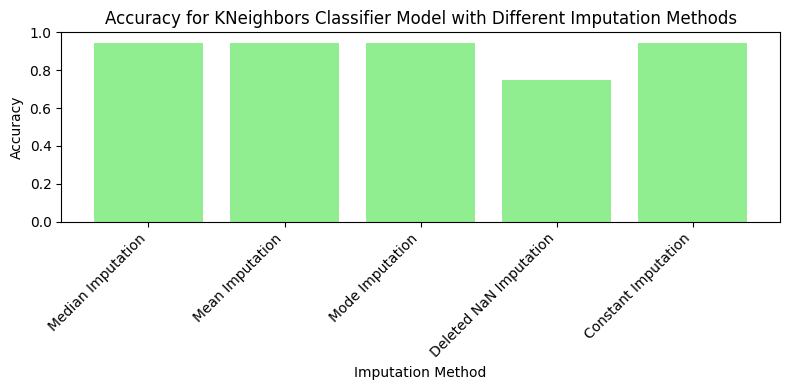

Model: Logistic Regression
Dataset Used:  Median Imputation
Test Accuracy:  0.9482886325272671
Model: Logistic Regression
Dataset Used:  Mean Imputation
Test Accuracy:  0.9484475781456133
Model: Logistic Regression
Dataset Used:  Mode Imputation
Test Accuracy:  0.9483013481767348
Model: Logistic Regression
Dataset Used:  Deleted NaN Imputation
Test Accuracy:  0.7881464413722479
Model: Logistic Regression
Dataset Used:  Constant Imputation
Test Accuracy:  0.9482568434035978


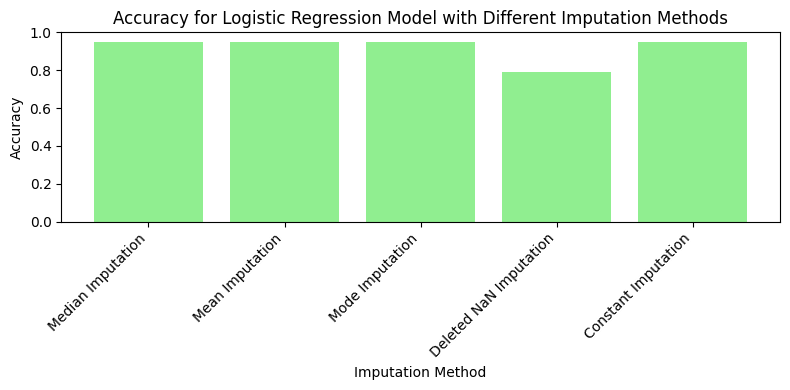

Model: Decision Tree Classifier
Dataset Used:  Median Imputation
Test Accuracy:  0.9383990361537703
Model: Decision Tree Classifier
Dataset Used:  Mean Imputation
Test Accuracy:  0.9392605214052064
Model: Decision Tree Classifier
Dataset Used:  Mode Imputation
Test Accuracy:  0.9385166559113465
Model: Decision Tree Classifier
Dataset Used:  Deleted NaN Imputation
Test Accuracy:  0.7348523638846219
Model: Decision Tree Classifier
Dataset Used:  Constant Imputation
Test Accuracy:  0.938453077664008


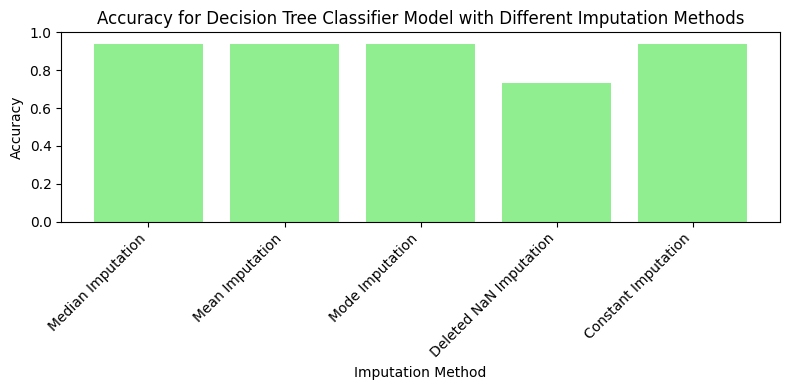

Model: Gradient Boosting
Dataset Used:  Median Imputation
Test Accuracy:  0.9510034236886191
Model: Gradient Boosting
Dataset Used:  Mean Imputation
Test Accuracy:  0.9515056918425929
Model: Gradient Boosting
Dataset Used:  Mode Imputation
Test Accuracy:  0.9509525610907484
Model: Gradient Boosting
Dataset Used:  Deleted NaN Imputation
Test Accuracy:  0.7976617170165557
Model: Gradient Boosting
Dataset Used:  Constant Imputation
Test Accuracy:  0.9508826250186762


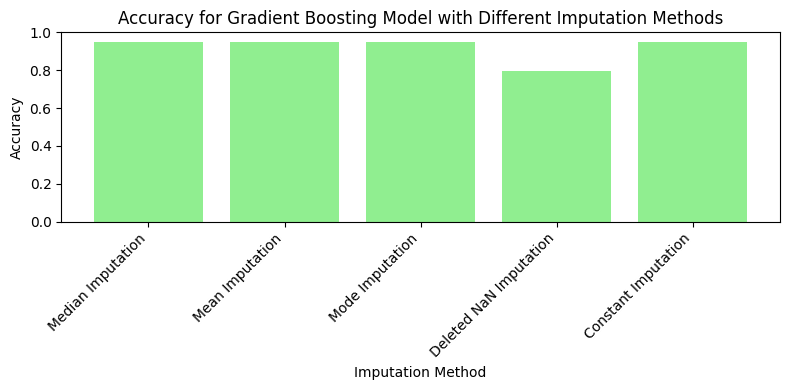

Model: Naive Bayes Classifier
Dataset Used:  Median Imputation
Test Accuracy:  0.938497582437145
Model: Naive Bayes Classifier
Dataset Used:  Mean Imputation
Test Accuracy:  0.9388631573593411
Model: Naive Bayes Classifier
Dataset Used:  Mode Imputation
Test Accuracy:  0.938497582437145
Model: Naive Bayes Classifier
Dataset Used:  Deleted NaN Imputation
Test Accuracy:  0.7689452124935996
Model: Naive Bayes Classifier
Dataset Used:  Constant Imputation
Test Accuracy:  0.9384880457000442


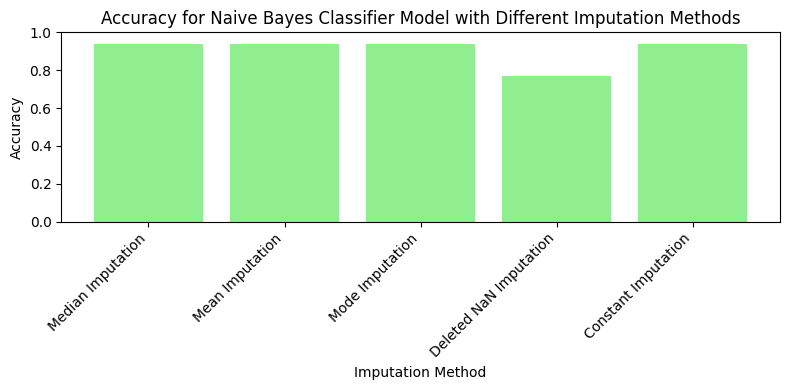

Dataset: Median Imputation
---------------------
Model: KNeighbors Classifier
Dataset Used:  Median Imputation
Test Accuracy:  0.9425824848286407

Model: Logistic Regression
Dataset Used:  Median Imputation
Test Accuracy:  0.9482886325272671

Model: Decision Tree Classifier
Dataset Used:  Median Imputation
Test Accuracy:  0.9383990361537703

Model: Gradient Boosting
Dataset Used:  Median Imputation
Test Accuracy:  0.9510034236886191

Model: Naive Bayes Classifier
Dataset Used:  Median Imputation
Test Accuracy:  0.938497582437145

Dataset: Mean Imputation
---------------------
Model: KNeighbors Classifier
Dataset Used:  Mean Imputation
Test Accuracy:  0.9421215425354369

Model: Logistic Regression
Dataset Used:  Mean Imputation
Test Accuracy:  0.9484475781456133

Model: Decision Tree Classifier
Dataset Used:  Mean Imputation
Test Accuracy:  0.9392605214052064

Model: Gradient Boosting
Dataset Used:  Mean Imputation
Test Accuracy:  0.9515056918425929

Model: Naive Bayes Classifier
Datase

In [31]:
knn_classifier = KNeighborsClassifier()
logistic_regression = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
naive_bayes = GaussianNB()

# List of models and their corresponding estimator objects
models = [
    ('KNeighbors Classifier', knn_classifier),
    ('Logistic Regression', logistic_regression),
    ('Decision Tree Classifier', decision_tree),
    ('Gradient Boosting', gradient_boosting),
    ('Naive Bayes Classifier', naive_bayes)
]

# Code for imputation and splitting data goes here

# Define a function to plot accuracy for each model and imputation method
def plot_accuracy_for_ml_method(model_name, model, X_train, X_test, y_train, y_test, imputation_datasets):
    dataset_names = []
    accuracy_values = []

    for dataset_name, X_train_imp, X_test_imp, y_train_imp, y_test_imp in imputation_datasets:
        pipeline = Pipeline([('imputation', 'passthrough'), ('model', model)])
        
        pipeline.fit(X_train_imp, y_train_imp)
        y_pred = pipeline.predict(X_test_imp)
        accuracy = accuracy_score(y_test_imp, y_pred)

        dataset_names.append(dataset_name)
        accuracy_values.append(accuracy)

        print(f"Model: {model_name}")
        print("Dataset Used: ", dataset_name)
        print("Test Accuracy: ", accuracy)

    plt.figure(figsize=(8, 4))
    plt.bar(dataset_names, accuracy_values, color='lightgreen')
    plt.xlabel('Imputation Method')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy for {model_name} Model with Different Imputation Methods')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

# Call the function for each model
for model_name, model in models:
    plot_accuracy_for_ml_method(model_name, model, X_train, X_test, y_train, y_test, datasets)

best_model = None
best_accuracy = 0.0

for dataset_name, X_train, X_test, y_train, y_test in datasets:
    print(f"Dataset: {dataset_name}")
    print("---------------------")
    for model_name, model in models:
        pipeline = Pipeline([('model', model)])

        scores = cross_val_score(pipeline, X_train, y_train, cv=5)

        pipeline.fit(X_train, y_train)

        y_pred = pipeline.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)

        print(f"Model: {model_name}")
        print("Dataset Used: ", dataset_name)
        print("Test Accuracy: ", accuracy)
        print()
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = (dataset_name, model_name, pipeline)

print("Best Model: ", best_model)